In [1]:
from tensorflow import keras
from keras.datasets import reuters
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

keras.__version__

'2.5.0'

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
train_labels.max()

45

In [4]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

reuters_df = pd.DataFrame(train_data_df)
reuters_df.columns=['train_data']
reuters_df['train_labels'] = train_labels_df
reuters_df

,train_data,train_labels
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...",3
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...",4
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...",3
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...",4
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...",4
...,...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...",19
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...",19
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...",25
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...",3


In [5]:
reuters_df.shape

(8982, 2)

In [6]:
reuters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    8982 non-null   object
 1   train_labels  8982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.5+ KB


In [7]:
for i in train_data[0]:
    print(i)

1
2
2
8
43
10
447
5
25
207
270
5
3095
111
16
369
186
90
67
7
89
5
19
102
6
19
124
15
90
67
84
22
482
26
7
48
4
49
8
864
39
209
154
6
151
6
83
11
15
22
155
11
15
7
48
9
4579
1005
504
6
258
6
272
11
15
22
134
44
11
15
16
8
197
1245
90
67
52
29
209
30
32
132
6
109
15
17
12


In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
test = reverse_word_index.get(9999 - 3, '?')
test

'boone'

In [9]:
sorted(reverse_word_index.items())[:9999]

[(1, 'the'),
 (2, 'of'),
 (3, 'to'),
 (4, 'in'),
 (5, 'said'),
 (6, 'and'),
 (7, 'a'),
 (8, 'mln'),
 (9, '3'),
 (10, 'for'),
 (11, 'vs'),
 (12, 'dlrs'),
 (13, 'it'),
 (14, 'reuter'),
 (15, '000'),
 (16, '1'),
 (17, 'pct'),
 (18, 'on'),
 (19, 'from'),
 (20, 'is'),
 (21, 'that'),
 (22, 'its'),
 (23, 'cts'),
 (24, 'by'),
 (25, 'at'),
 (26, 'year'),
 (27, 'be'),
 (28, 'with'),
 (29, '2'),
 (30, 'will'),
 (31, 'was'),
 (32, 'billion'),
 (33, 'he'),
 (34, 'u'),
 (35, 's'),
 (36, 'net'),
 (37, 'has'),
 (38, 'would'),
 (39, 'an'),
 (40, 'as'),
 (41, '5'),
 (42, 'not'),
 (43, 'loss'),
 (44, '4'),
 (45, '1986'),
 (46, 'company'),
 (47, 'which'),
 (48, 'but'),
 (49, 'this'),
 (50, 'shr'),
 (51, 'last'),
 (52, 'are'),
 (53, 'lt'),
 (54, 'have'),
 (55, 'or'),
 (56, '6'),
 (57, 'bank'),
 (58, '7'),
 (59, 'were'),
 (60, '8'),
 (61, 'had'),
 (62, 'oil'),
 (63, 'trade'),
 (64, 'share'),
 (65, 'one'),
 (66, 'about'),
 (67, '0'),
 (68, 'inc'),
 (69, '9'),
 (70, 'new'),
 (71, 'profit'),
 (72, 'also'),
 (7

In [10]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 데이터 준비

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    print()
    return results

def vectorize_sequences1(sequences, dimension=46):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    print()
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = vectorize_sequences1(train_labels)
y_test = vectorize_sequences1(test_labels)

In [12]:
y_test.shape

(2246, 46)

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
x_val = x_train[:2246]
partial_x_train = x_train[2246:]

y_val = y_train[:2246]
partial_y_train = y_train[2246:]

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/8
14/14 [==============================] - 1s 36ms/step - loss: 3.3905 - accuracy: 0.3711 - val_loss: 2.6870 - val_accuracy: 0.5049
Epoch 2/8
14/14 [==============================] - 0s 17ms/step - loss: 2.1449 - accuracy: 0.5966 - val_loss: 1.8073 - val_accuracy: 0.6215
Epoch 3/8
14/14 [==============================] - 0s 17ms/step - loss: 1.4509 - accuracy: 0.6948 - val_loss: 1.4545 - val_accuracy: 0.6950
Epoch 4/8
14/14 [==============================] - 0s 18ms/step - loss: 1.1119 - accuracy: 0.7724 - val_loss: 1.2805 - val_accuracy: 0.7293
Epoch 5/8
14/14 [==============================] - 0s 17ms/step - loss: 0.8868 - accuracy: 0.8170 - val_loss: 1.1826 - val_accuracy: 0.7471
Epoch 6/8
14/14 [==============================] - 0s 17ms/step - loss: 0.7171 - accuracy: 0.8523 - val_loss: 1.0994 - val_accuracy: 0.7756
Epoch 7/8
14/14 [==============================] - 0s 17ms/step - loss: 0.5798 - accuracy: 0.8835 - val_loss: 1.0523 - val_accuracy: 0.7818
Epoch 8/8
14/14 [===

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

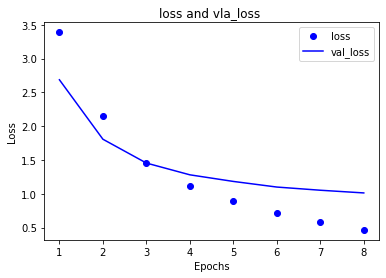

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='loss')

plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and vla_loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
print("/n Accuracy : %.4f"%(model.evaluate(x_val, y_val)[1]))

71/71 [==============================] - 0s 2ms/step - loss: 1.0125 - accuracy: 0.7916
/n Accuracy : 0.7916
